In [21]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [22]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [23]:
trainlabel=traindata['label'].values

In [24]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [25]:
trainimages=trainimages.reshape(-1,28,28,1)

In [26]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [27]:
testlabel=testdata['label'].values

In [28]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [29]:
testimages=testimages.reshape(-1,28,28,1)

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
traingen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [32]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [33]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [44]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))



In [45]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 26, 26, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                      

In [47]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [38]:
#annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [48]:
history=model.fit(traindata_generator,epochs=8,validation_data=validationdata_generator,callbacks=[callback,annealer])

Epoch 1/8
773/773 [==============================] - 55s 71ms/step - loss: 0.9596 - accuracy: 0.7020 - val_loss: 1.3604 - val_accuracy: 0.5832 - lr: 0.0010
Epoch 2/8
773/773 [==============================] - 53s 69ms/step - loss: 0.2451 - accuracy: 0.9220 - val_loss: 0.1943 - val_accuracy: 0.9377 - lr: 9.5000e-04
Epoch 3/8
773/773 [==============================] - 54s 69ms/step - loss: 0.1463 - accuracy: 0.9541 - val_loss: 0.0754 - val_accuracy: 0.9756 - lr: 9.0250e-04
Epoch 4/8
773/773 [==============================] - 53s 69ms/step - loss: 0.0971 - accuracy: 0.9704 - val_loss: 0.1294 - val_accuracy: 0.9577 - lr: 8.5737e-04
Epoch 5/8
773/773 [==============================] - 56s 73ms/step - loss: 0.0735 - accuracy: 0.9770 - val_loss: 0.0637 - val_accuracy: 0.9818 - lr: 8.1451e-04
Epoch 6/8
773/773 [==============================] - 61s 79ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.0772 - val_accuracy: 0.9741 - lr: 7.7378e-04
Epoch 7/8
773/773 [=========================

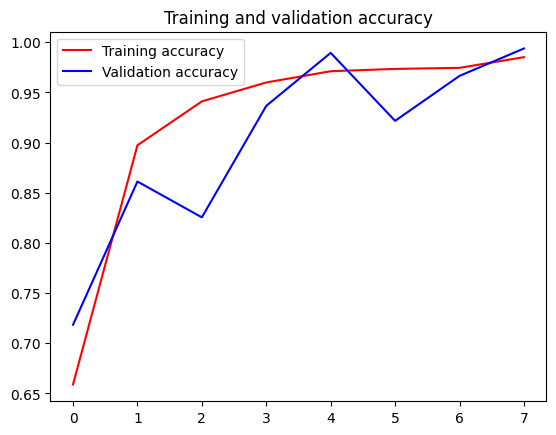

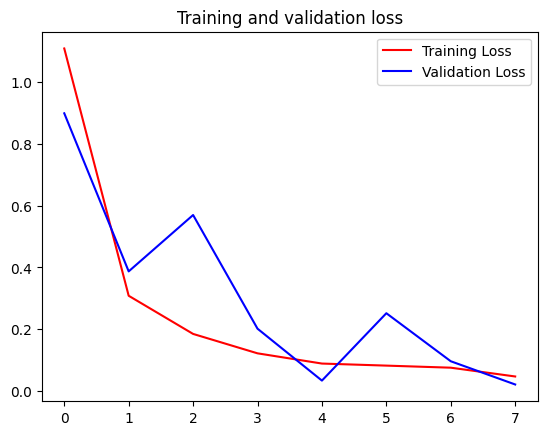

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

/var/folders/s_/9hg8w5114qg8j3k5bh9xnv0w0000gn/T/ipykernel_2059/141321762.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))


test accuracy: 99.14947152137756


In [42]:
model.save_weights("vgglikeconv4.h5")

In [43]:
model.save('models/model14.h5')